In [1]:
import numpy as np
from msmbuilder.feature_selection import VarianceThreshold
from msmbuilder.decomposition import tICA
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.msm import MarkovStateModel
from sklearn.pipeline import Pipeline
from glob import glob

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pa

In [3]:
# 	    id	    feature	    strategy	cluster__n_clusters	tica__n_components	tica__lag_time	variance_cut__threshold	test_scores_mean	rank
# 3000	3927	pp_tor	    fixed	   56	                3	                384	            0.000656	3.450051	1.0
# 1921	2283	kappa_angle	fixed	   255	                2	                430	            0.000798	2.997726	2.0
# 1454	1812	kappa_angle	fixed	   755	                3	                401	            0.043183	2.996376	3.0
# 1674	2033	kappa_angle	fixed	   273	                2	                393	            0.000418	2.996359	4.0
# 1397	1755	kappa_angle	fixed	   101	                3	                77	            0.003388	2.995021	5.0

In [2]:
feature= 'kappa_angle'
trial_id = 1921
n_clusters = 255
n_components = 2
lag_time = 430
var_cut = 0.000798


In [3]:
traj_paths = glob('/Users/robert_arbon/Datasets/DHFR/train/'+feature+'/trajectory-*.npy')

len(traj_paths)

398

In [4]:
trajs = [np.load(x) for x in traj_paths]

## Generate discrete trajectories

In [5]:
variance = VarianceThreshold(threshold=var_cut)
tica=tICA(kinetic_mapping=True, lag_time=lag_time, n_components=n_components)
cluster = MiniBatchKMeans(n_clusters=n_clusters)
vtrajs = variance.fit_transform(trajs)
ttrajs = tica.fit_transform(vtrajs)
ctrajs = cluster.fit_transform(ttrajs)


## Check timescales

In [11]:
from pyemma import msm
import pyemma.plots as mplt
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
its = msm.timescales_msm(ctrajs,lags = np.arange(20,150,5), errors='bayes')

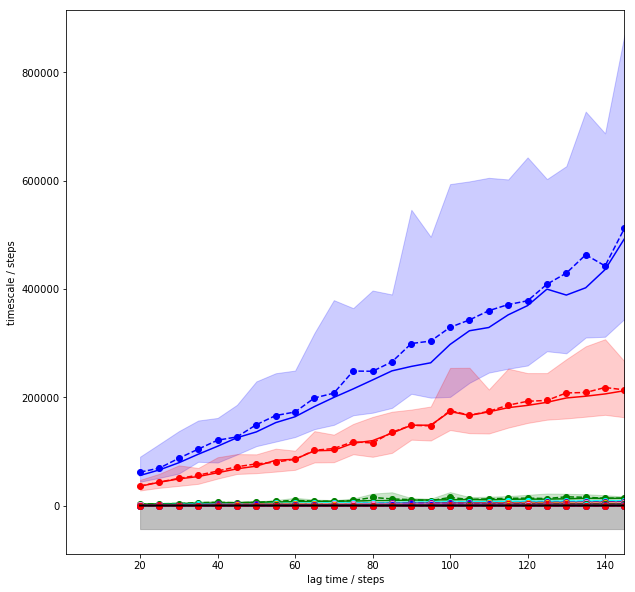

In [18]:
fig, axis = plt.subplots(1, figsize=(10,10))
#
mplt.plot_implied_timescales(its, ax=axis, ylog=False)
# axis.set_ylim(0, 500);
# axis.set_title('good discretization')